# PyBinding tutorial

## Import statements

In [2]:
import pybinding as pb
import numpy as np
import matplotlib.pyplot as plt

In [3]:
## To use the default style of pybinding
# pb.pltutils.use_style()

## Lattice

In [4]:
d = 0.2 # [nm] unit cell length
t = 1   # [eV] hopping energy

In [5]:
lattice = pb.Lattice(a1=[d,0], a2=[0,d])
lattice.add_sublattices(
    ('A', [0, 0]) # add an atom called 'A' at position [0,0]
)
lattice.add_hoppings(
     #(relative_index, from_sublattice, to_sublattice, energy)
    ([0,1], 'A', 'A', t),
    ([1,0], 'A', 'A', t)
)

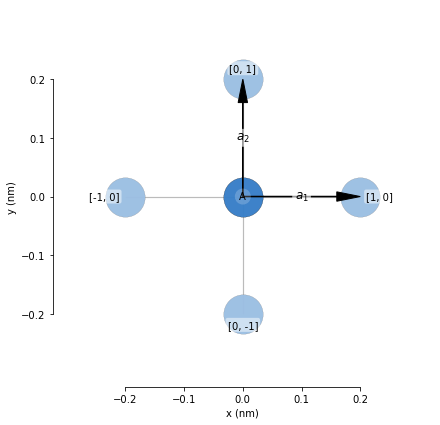

In [6]:
plt.figure(figsize=(7,7))
lattice.plot()
plt.show()

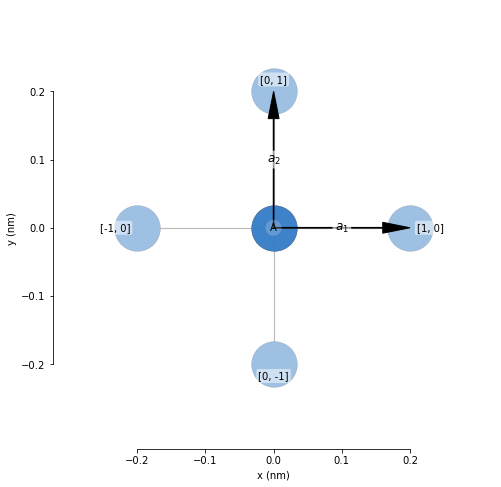

In [7]:
def square_lattice(d, t):
    lat = pb.Lattice(a1=[d,0], a2=[0,d])
    lat.add_sublattices(('A', [0, 0]))
    lat.add_hoppings(
        ([1,0], 'A', 'A', t),
        ([0,1], 'A', 'A', t)
    )
    return lat

lattice = square_lattice(d=0.2, t=1)


plt.figure(figsize=(7,7))
lattice.plot()
plt.tight_layout()
plt.show()


## Graphene

In [8]:
# Define the graphene lattice
sin_30, cos_30 = (1/2, np.sqrt(3)/2)

t = -2.6

graphene = pb.Lattice(a1 = [1,0], a2 = [sin_30, cos_30])
graphene.add_sublattices(
    ('A',[0,0]),
    ('B',[0,1/np.sqrt(3)])
)
graphene.add_hoppings(
    ([0,0], 'A', 'B', t),
    ([0,-1],'A', 'B', t),
    ([1,-1],'A', 'B', t),
)

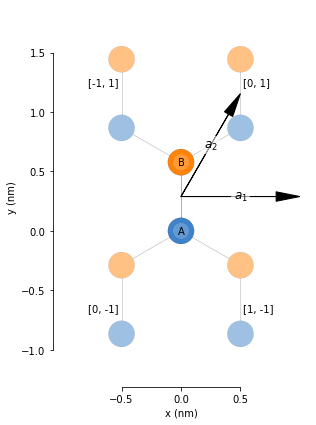

In [9]:
plt.figure(figsize=(7,7))
graphene.plot()

## Brillouin zone

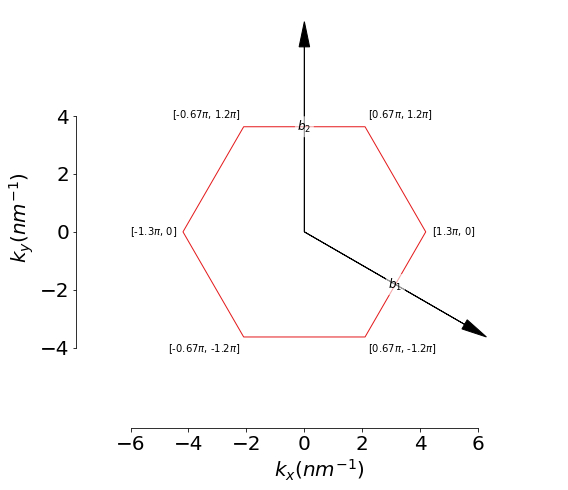

In [10]:
fig, ax = plt.subplots(figsize=(8,8))
grafico = graphene.plot_brillouin_zone()
ax.set_xlabel(ax.get_xlabel(), fontsize=20)
ax.set_ylabel(ax.get_ylabel(), fontsize=20)
ax.tick_params(labelsize=20)
plt.tight_layout()

## Band structure

### Model

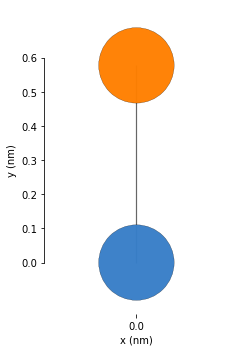

In [11]:
model = pb.Model(graphene)

plt.figure(figsize=(5,5))
model.plot()
plt.ylim(-.15, .75)
plt.tight_layout()

In [12]:
print(model.system.x)

[0. 0.]


In [13]:
print(model.system.y)

[0.         0.57735026]


In [14]:
print(model.system.sublattices)

[0 1]


In [15]:
print(model.hamiltonian)

  (0, 1)	-2.6
  (1, 0)	-2.6


In [16]:
print(model.hamiltonian.todense())

[[ 0.  -2.6]
 [-2.6  0. ]]


(-0.7, 0.7)

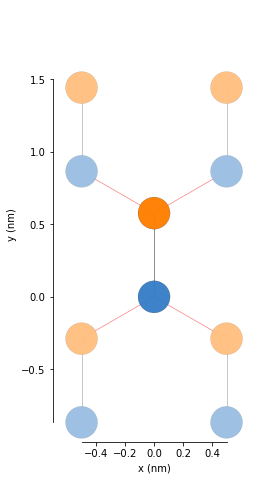

In [17]:
model = pb.Model(
    graphene,
    pb.translational_symmetry()
)

plt.figure(figsize=(8,8))
model.plot()
plt.ylim(-1,2)
plt.xlim(-.7,.7)

### Solver

In [18]:
solver = pb.solver.lapack(model)

In [19]:
print(solver.eigenvalues)

[-7.7999997  7.7999997]


In [20]:
print(solver.eigenvectors)

[[-0.70710677+0.j -0.70710677+0.j]
 [-0.70710677+0.j  0.70710677+0.j]]


#### Bands

In [21]:
from math import pi, sqrt

a_cc = 1/sqrt(3) # distance between Carbon atoms
Gamma = [0,0]
K1 = [-4*pi/(3*sqrt(3)*a_cc), 0]
M = [0, 2*pi/(3*a_cc)]
K2 = [2*pi/(3*sqrt(3)*a_cc), 2*pi/(3*a_cc)]

In [22]:
bands = solver.calc_bands(K1, Gamma, M, K2)

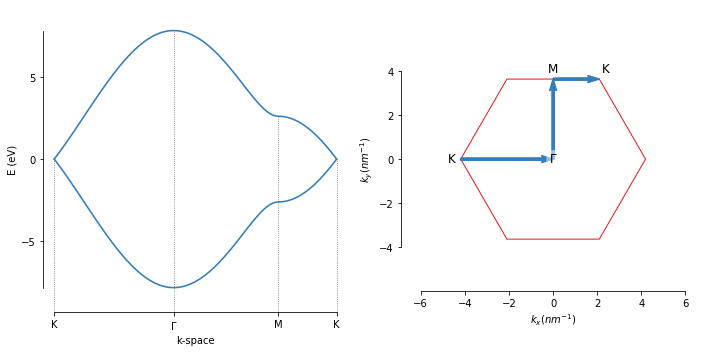

In [23]:
plt.figure(figsize=(10,5))

plt.subplot(121)
bands.plot(point_labels=['K', r'$\Gamma$', 'M', 'K'])

plt.subplot(122)
graphene.plot_brillouin_zone(decorate=False)
bands.plot_kpath(point_labels=['K', r'$\Gamma$', 'M', 'K'])

plt.tight_layout()

## Finite size

### Primitive

(-0.15, 0.75)

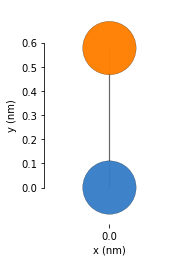

In [24]:
model = pb.Model(graphene)
model.plot()
plt.ylim(-.15, .75)

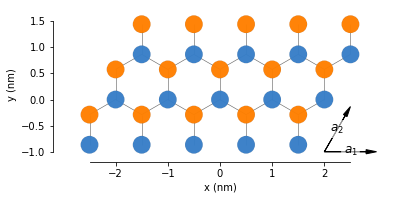

In [25]:
model = pb.Model(
    graphene,
    pb.primitive(a1=5, a2=3)
)

model.plot()
model.lattice.plot_vectors(position=[2,-1])

The `primitive()` parameter tells the model to replicate the unit cell 5 times in the $a_1$ vector and 3 times in the $a_2$ direction.

### Polygon

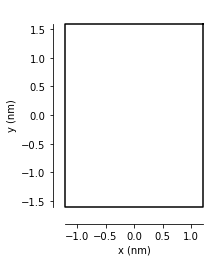

In [27]:
def rectangle(width, length):
    x0 = length/2
    y0 = width/2
    ## Define the polygon following the points clockwise (or counter-clockwise)
    return pb.Polygon([[x0,y0],[x0,-y0],[-x0,-y0],[-x0,y0]])

shape = rectangle(3.2, 2.4)
shape.plot()

In [40]:
model = pb.Model(
    graphene,
    rectangle(width=8, length=12)
)

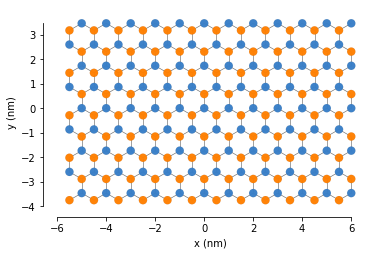

In [41]:
model.plot()

### Freeform shape

In [42]:
def circle(radius):
    def contains(x,y,z):
        return np.sqrt(x**2 + y**2) < radius
    return pb.FreeformShape(contains, width=[2*radius, 2*radius])

In [47]:
model = pb.Model(
    graphene,
    circle(radius=10)
)

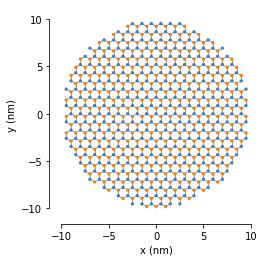

In [48]:
model.plot()

"The `width` parameter of FreeformShape specifies the bounding box width. Only sites inside the bounding box will be considered for the shape. It’s like carving a sculpture from a block of stone. The bounding box can be thought of as the stone block, while the contains function is the carving tool that can give the fine detail of the shape."